# 02 Linear Regression

## Importing data

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep=';')
df

,Education,Marital_Status,Income,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Age,CustomerDayLong,MNT
0,2,4,58138.0,0,58,3.0,8.0,10.0,4,7.0,0.000000,0.0,64.0,3314,1617.000000
1,2,4,46344.0,1,38,2.0,1.0,1.0,2,5.0,0.000000,0.0,67.0,2764,27.000000
2,2,5,71613.0,0,26,1.0,8.0,2.0,10,4.0,0.000000,0.0,56.0,2963,776.000000
3,2,5,26646.0,1,26,2.0,2.0,0.0,4,6.0,0.000000,0.0,37.0,2790,53.000000
4,4,3,58293.0,1,94,5.0,5.0,3.0,6,5.0,0.000000,0.0,40.0,2812,422.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,2.0,9.0,3.0,4,5.0,0.000000,0.0,54.0,3032,1294.524192
2236,4,5,64014.0,2,56,7.0,8.0,2.0,5,7.0,0.800234,0.0,75.0,2670,444.000000
2237,2,2,56981.0,0,91,1.0,2.0,3.0,13,6.0,0.000000,0.0,40.0,2806,1241.000000
2238,3,5,69245.0,0,8,2.0,6.0,5.0,10,3.0,0.000000,0.0,65.0,2807,843.000000


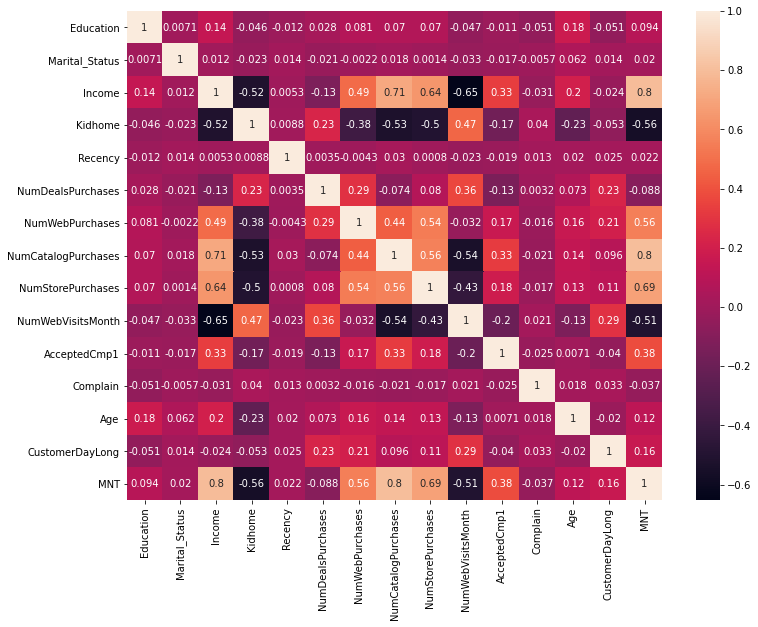

In [8]:

# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Splitting

In [14]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['MNT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Simple Linear Regression

In [15]:
# Fitting Simple Linear Regression to the Training set (M2)
f1 = ['Income']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([0.02237955]), -558.0707639907021)

In [16]:

# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.632

In [17]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(362.93, 336.11)

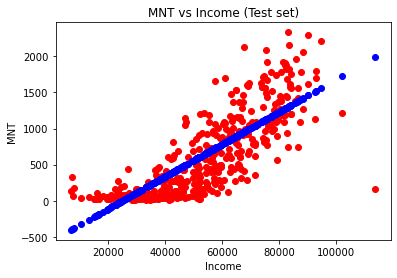

In [18]:
# Visualising the Test set results
plt.scatter(X_test['Income'], y_test, color = 'red')
plt.plot(X_test['Income'], sr.predict(X_test[f1]), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('MNT')
plt.show()

## Multiple Linear Regression

In [20]:
!pip3 install statsmodels

In [21]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.805

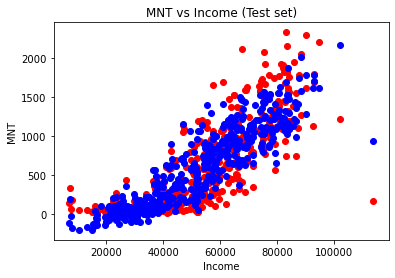

In [22]:
# Visualising the Test set results
plt.scatter(X_test['Income'], y_test, color = 'red')
plt.plot(X_test['Income'], mr.predict(X_test), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('MNT')
plt.show()

In [23]:

# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MNT   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:36:01   Log-Likelihood:                -12535.
No. Observations:                1792   AIC:                         2.510e+04
Df Residuals:                    1777   BIC:                         2.518e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1138.8106    109.027    -10.445      0.000   -1352.646    -924.976
Education               6.3270      5.750      1.100      0.271      -4.950      17.604
Marital_Status          6.7915      5.832      1.165      0.244      -4.646      18.229
Income                  0.0092      0.001     16.460      0.000       0.008       0.010
Kidhome               -53.4767     16.188     -3.303      0.001     -85.227     -21.727
Recency                 0.3136      0.217      1.442      0.149      -0.113       0.740
NumDealsPurchases     -24.8283      4.548     -5.459      0.000     -33.748     -15.908
NumWebPurchases        28.8759      3.640      7.934      0.000      21.738      36.014
NumCatalogPurchases    76.1421      3.549     21.457      0.000      69.182      83.102
NumStorePurchases      30.2762      2.886     10.491      0.000      24.616      35.936
NumWebVisitsMonth       3.4276      4.654      0.736      0.462      -5.701      12.556
AcceptedCmp1          288.6136     34.704      8.316      0.000     220.549     356.678
Complain             -282.7343    205.583     -1.375      0.169    -685.944     120.476
Age                    -2.2660      0.573     -3.954      0.000      -3.390      -1.142
CustomerDayLong         0.2931      0.035      8.399      0.000       0.225       0.362
==============================================================================
Omnibus:                      219.686   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              884.808
Skew:                           0.539   Prob(JB):                    7.35e-193
Kurtosis:                       6.269   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Recursive feature elimination

In [24]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [25]:

# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-577.22757789,  877.25963802, -307.22633864]), 814.2221404115987)

In [26]:
# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.402

In [27]:
# Mean squared error
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(462.71, 454.94)

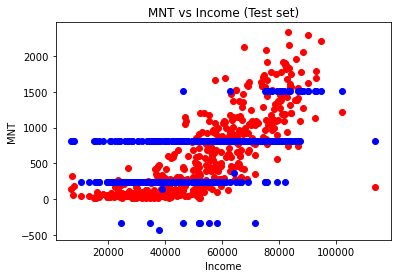

In [28]:
# Visualising the Test set results
plt.scatter(X_test['Income'], y_test, color = 'red')
plt.plot(X_test['Income'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('MNT')
plt.show()